# Recommendation System - Movie Recommendation
## This notebook outlines the concepts involved in building a Complete Recommendation System for recommending Movies to users
## Movie Recommender System - A very very very simple Clone of Netflix

**MovieLens 20M movie ratings dataset** and build a model to **recommend movies** to the end users. This data has been collected by the GroupLens Research Project at the University of Minnesota. 

This dataset consists of:
- **20 million ratings ** (1-5) from **138,000  users** on **27,000 movies**
- Demographic information of the users (age, gender, occupation, etc.)

Dataset: 

### Import the libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

### Loading all Files which are necessary

#### 1. Reading Rating File

In [2]:
ratings = pd.read_csv(
    'ratings.dat',
    sep = "::",
    names = ['userId', 'movieId', 'rating', 'timestamp']
)

/tmp/ipykernel_25225/3483650022.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_csv(


#### 2. Reading Movie File

In [3]:
movies = pd.read_csv(
    'movies.dat',
    sep = "::",
    names = ['movieId', 'title', 'genres'],
    encoding='latin-1',
    engine='python',
)

### Explore each file

In [4]:
print("\nRating Data :")
print("shape : ", ratings.shape)
print(ratings.head())
print("-------------------------------------------------------------")
print("\nMovie Data :")
print("shape : ", movies.shape)
print(movies.head())



Rating Data :
shape :  (1000209, 4)
   userId  movieId  rating  timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291
-------------------------------------------------------------

Movie Data :
shape :  (3883, 3)
   movieId                               title                        genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy


### How many unique users?

In [5]:
n_users = ratings.userId.unique().shape[0]
n_users

6040

### How many unique items / movies?

In [6]:
n_items = movies.movieId.unique().shape[0]
n_items

3883

In [7]:
movies.genres = movies.genres.apply(lambda x: x.split('|'))

In [8]:
# Using pd.get_dummies() method
s = movies.genres.squeeze()
result = pd.get_dummies(s.apply(pd.Series).stack()).sum(level=0)

/tmp/ipykernel_25225/4035996858.py:3: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  result = pd.get_dummies(s.apply(pd.Series).stack()).sum(level=0)


In [9]:
type(result)

pandas.core.frame.DataFrame

In [10]:
data = pd.concat([movies,result],axis=1)

In [11]:
data.head()

,movieId,title,genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),"[Animation, Children's, Comedy]",0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]",0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),"[Comedy, Drama]",0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),[Comedy],0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
user_movies_data = ratings.pivot(index = 'movieId', columns = 'userId', values = 'rating').fillna(0)

In [13]:
user_movies_data

userId,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
movieId,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,5.0,5.0,...,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,3.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Find which movies are not rated and remove from data

In [14]:
diff = list(set(movies.movieId) - set(ratings.movieId))
len(diff)

177

In [15]:
data = data[data.movieId.isin(ratings.movieId)]

In [16]:
data.shape

(3706, 21)

# 1. Content Filtering

### Data Preparation
Prepare data for Metadata to have a TF-IDF Vectorizer for Content Filtering

In [17]:
data

,movieId,title,genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),"[Animation, Children's, Comedy]",0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]",0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),"[Comedy, Drama]",0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),[Comedy],0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),[Comedy],0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3879,3949,Requiem for a Dream (2000),[Drama],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3880,3950,Tigerland (2000),[Drama],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3881,3951,Two Family House (2000),[Drama],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
lst = ['Action', 'Adventure', 'Animation',
       'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western']

In [19]:
for i in lst:
    column = 'metadata_{}'.format(i)
    lst = []
    for j in data[i]:
        if j==1:
            lst.append(i)
        else:
            lst.append("")
    data[column] = lst
        

In [20]:
data.head()

,movieId,title,genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,metadata_Fantasy,metadata_Film-Noir,metadata_Horror,metadata_Musical,metadata_Mystery,metadata_Romance,metadata_Sci-Fi,metadata_Thriller,metadata_War,metadata_Western
0,1,Toy Story (1995),"[Animation, Children's, Comedy]",0,0,1,1,1,0,0,...,,,,,,,,,,
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]",0,1,0,1,0,0,0,...,Fantasy,,,,,,,,,
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",0,0,0,0,1,0,0,...,,,,,,Romance,,,,
3,4,Waiting to Exhale (1995),"[Comedy, Drama]",0,0,0,0,1,0,0,...,,,,,,,,,,
4,5,Father of the Bride Part II (1995),[Comedy],0,0,0,0,1,0,0,...,,,,,,,,,,


In [21]:
data.columns

Index(['movieId', 'title', 'genres', 'Action', 'Adventure', 'Animation',
       'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western', 'metadata_Action', 'metadata_Adventure',
       'metadata_Animation', 'metadata_Children's', 'metadata_Comedy',
       'metadata_Crime', 'metadata_Documentary', 'metadata_Drama',
       'metadata_Fantasy', 'metadata_Film-Noir', 'metadata_Horror',
       'metadata_Musical', 'metadata_Mystery', 'metadata_Romance',
       'metadata_Sci-Fi', 'metadata_Thriller', 'metadata_War',
       'metadata_Western'],
      dtype='object')

In [22]:
data['full_metadata'] = data[['metadata_Action', 'metadata_Adventure',
       'metadata_Animation', 'metadata_Children\'s', 'metadata_Comedy',
       'metadata_Crime', 'metadata_Documentary', 'metadata_Drama',
       'metadata_Fantasy', 'metadata_Film-Noir', 'metadata_Horror',
       'metadata_Musical', 'metadata_Mystery', 'metadata_Romance',
       'metadata_Sci-Fi', 'metadata_Thriller', 'metadata_War',
       'metadata_Western']].apply(lambda x: ' '.join(x), axis = 1)
                                
                                

In [23]:
data

,movieId,title,genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,metadata_Film-Noir,metadata_Horror,metadata_Musical,metadata_Mystery,metadata_Romance,metadata_Sci-Fi,metadata_Thriller,metadata_War,metadata_Western,full_metadata
0,1,Toy Story (1995),"[Animation, Children's, Comedy]",0,0,1,1,1,0,0,...,,,,,,,,,,Animation Children's Comedy
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]",0,1,0,1,0,0,0,...,,,,,,,,,,Adventure Children's Fantasy
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",0,0,0,0,1,0,0,...,,,,,Romance,,,,,Comedy Romance
3,4,Waiting to Exhale (1995),"[Comedy, Drama]",0,0,0,0,1,0,0,...,,,,,,,,,,Comedy Drama
4,5,Father of the Bride Part II (1995),[Comedy],0,0,0,0,1,0,0,...,,,,,,,,,,Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),[Comedy],0,0,0,0,1,0,0,...,,,,,,,,,,Comedy
3879,3949,Requiem for a Dream (2000),[Drama],0,0,0,0,0,0,0,...,,,,,,,,,,Drama
3880,3950,Tigerland (2000),[Drama],0,0,0,0,0,0,0,...,,,,,,,,,,Drama
3881,3951,Two Family House (2000),[Drama],0,0,0,0,0,0,0,...,,,,,,,,,,Drama


## TF-IDF Vectorizer on Metadata

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['full_metadata'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=data.index.tolist())
print(tfidf_df.shape)

(3706, 20)


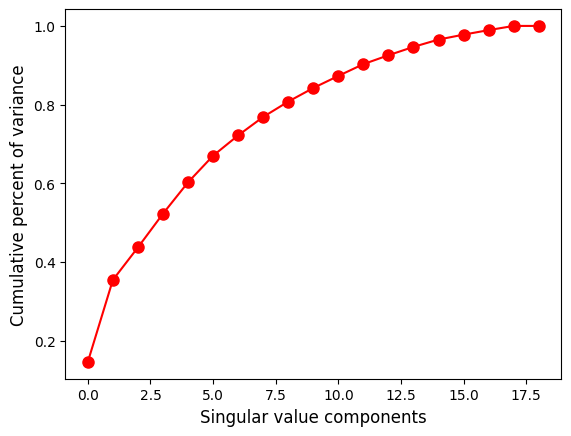

In [25]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=19)
latent_matrix = svd.fit_transform(tfidf_df)
# plot var expalined to see what latent dimensions to use
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms = 16, color='red')
plt.xlabel('Singular value components', fontsize= 12)
plt.ylabel('Cumulative percent of variance', fontsize=12)        
plt.show()

In [26]:
n = 20
latent_matrix_1_df = pd.DataFrame(latent_matrix[:,0:n], index=data.title.tolist())

In [27]:
latent_matrix_1_df.shape

(3706, 19)

## 2. Collaborative Filtering
- Use user_movies_data

In [28]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=200)
latent_matrix_2 = svd.fit_transform(user_movies_data)
latent_matrix_2_df = pd.DataFrame(latent_matrix_2, index=data.title.tolist())

In [29]:
data.shape

(3706, 40)

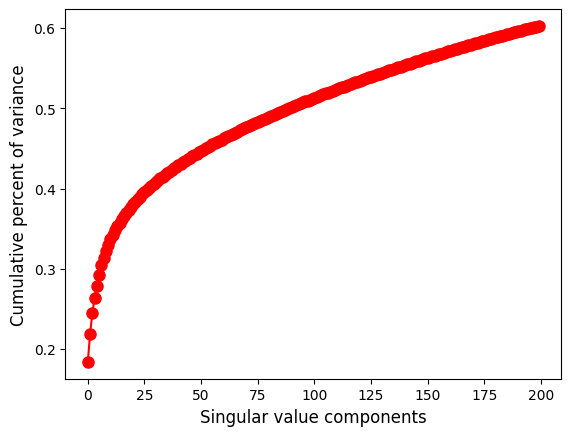

In [30]:
# plot variance expalined to see what latent dimensions to use
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms = 16, color='red')
plt.xlabel('Singular value components', fontsize= 12)
plt.ylabel('Cumulative percent of variance', fontsize=12)        
plt.show()


In [31]:
from sklearn.metrics.pairwise import cosine_similarity
# take the latent vectors for a selected movie from both content 
# and collaborative matrixes
a_1 = np.array(latent_matrix_1_df.loc['Toy Story (1995)']).reshape(1, -1)
a_2 = np.array(latent_matrix_2_df.loc["Toy Story (1995)"]).reshape(1, -1)

# calculate the similartity of this movie with the others in the list
score_1 = cosine_similarity(latent_matrix_1_df, a_1).reshape(-1)
score_2 = cosine_similarity(latent_matrix_2_df, a_2).reshape(-1)

# an average measure of both content and collaborative 
hybrid = ((score_1 + score_2)/2.0)

# form a data frame of similar movies 
dictDf = {'content': score_1 , 'collaborative': score_2, 'hybrid': hybrid} 
# dictDf = {'collaborative': score_2} 
similar = pd.DataFrame(dictDf, index = latent_matrix_2_df.index )

#sort it on the basis of either: content, collaborative or hybrid, 
# here : content
similar.sort_values('content', ascending=False, inplace=True)

similar[1:].head(11)

,content,collaborative,hybrid
Chicken Run (2000),1.000000,0.491975,0.745987
Aladdin and the King of Thieves (1996),1.000000,0.455090,0.727545
Toy Story 2 (1999),1.000000,0.704534,0.852267
"Bug's Life, A (1998)",1.000000,0.635682,0.817841
"Rugrats Movie, The (1998)",1.000000,0.398212,0.699106
"American Tail, An (1986)",1.000000,0.464012,0.732006
"Adventures of Rocky and Bullwinkle, The (2000)",1.000000,0.348558,0.674279
"American Tail: Fievel Goes West, An (1991)",1.000000,0.397734,0.698867
Saludos Amigos (1943),1.000000,0.193700,0.596850
"Rescuers Down Under, The (1990)",0.938437,0.410648,0.674543


In [32]:
similar.sort_values('collaborative', ascending=False, inplace=True)

similar[1:].head(11)

,content,collaborative,hybrid
Aladdin (1992),0.812566,0.708145,0.760356
Toy Story 2 (1999),1.000000,0.704534,0.852267
Groundhog Day (1993),0.197957,0.655285,0.426621
"Lion King, The (1994)",0.745574,0.649869,0.697721
Wayne's World (1992),0.345450,0.637022,0.491236
"Bug's Life, A (1998)",1.000000,0.635682,0.817841
Beauty and the Beast (1991),0.745574,0.628955,0.687265
Babe (1995),0.625126,0.611900,0.618513
Back to the Future (1985),0.134796,0.604287,0.369542
Pleasantville (1998),0.345450,0.604237,0.474843


In [33]:
similar.sort_values('hybrid', ascending=False, inplace=True)

similar[1:].head(11)

,content,collaborative,hybrid
Toy Story 2 (1999),1.000000,0.704534,0.852267
"Bug's Life, A (1998)",1.000000,0.635682,0.817841
Aladdin (1992),0.812566,0.708145,0.760356
Antz (1998),0.938437,0.575306,0.756872
Chicken Run (2000),1.000000,0.491975,0.745987
Tarzan (1999),0.938437,0.533569,0.736003
Mulan (1998),0.938437,0.533158,0.735797
"American Tail, An (1986)",1.000000,0.464012,0.732006
Aladdin and the King of Thieves (1996),1.000000,0.455090,0.727545
"Iron Giant, The (1999)",0.938437,0.515281,0.726859


## 3. Hybrid Recommendation System

In [34]:
def recommend_similar_movies(title):
    # take the latent vectors for a selected movie from both content 
    # and collaborative matrixes
    a_1 = np.array(latent_matrix_1_df.loc[title]).reshape(1, -1)
    a_2 = np.array(latent_matrix_2_df.loc[title]).reshape(1, -1)

    # calculate the similartity of this movie with the others in the list
    score_1 = cosine_similarity(latent_matrix_1_df, a_1).reshape(-1)
    score_2 = cosine_similarity(latent_matrix_2_df, a_2).reshape(-1)

    # an average measure of both content and collaborative 
    hybrid = ((score_1 + score_2)/2.0)

    # form a data frame of similar movies 
    dictDf = {'content': score_1 , 'collaborative': score_2, 'hybrid': hybrid} 
    similar = pd.DataFrame(dictDf, index = latent_matrix_2_df.index )

    #sort it on the basis of either: content, collaborative or hybrid
    similar.sort_values('hybrid', ascending=False, inplace=True)

    print(similar[1:].head(11))

In [35]:
recommend_similar_movies("Tarzan (1999)")

                                 content  collaborative    hybrid
Mulan (1998)                         1.0       0.901072  0.950536
Antz (1998)                          1.0       0.759845  0.879923
Rescuers Down Under, The (1990)      1.0       0.734614  0.867307
Oliver & Company (1988)              1.0       0.705983  0.852992
Fox and the Hound, The (1981)        1.0       0.703246  0.851623
Road to El Dorado, The (2000)        1.0       0.697118  0.848559
Aristocats, The (1970)               1.0       0.683408  0.841704
Balto (1995)                         1.0       0.674089  0.837044
Sword in the Stone, The (1963)       1.0       0.662210  0.831105
Doug's 1st Movie (1999)              1.0       0.660288  0.830144
Rescuers, The (1977)                 1.0       0.660142  0.830071


In [36]:
recommend_similar_movies("Anaconda (1997)")

                            content  collaborative    hybrid
Daylight (1996)            1.000000       0.792031  0.896015
Chain Reaction (1996)      1.000000       0.756477  0.878238
Con Air (1997)             1.000000       0.754579  0.877289
Surviving the Game (1994)  1.000000       0.735254  0.867627
Firestorm (1998)           1.000000       0.692676  0.846338
Maximum Risk (1996)        1.000000       0.690481  0.845241
Waterworld (1995)          0.839022       0.778679  0.808851
Rock, The (1996)           1.000000       0.608243  0.804121
Dante's Peak (1997)        0.766889       0.840337  0.803613
GoldenEye (1995)           1.000000       0.600749  0.800375
Twister (1996)             0.874748       0.710418  0.792583


In [37]:
recommend_similar_movies("Ghost and the Darkness, The (1996)")

                                              content  collaborative    hybrid
Waterworld (1995)                            1.000000       0.784315  0.892157
Avengers, The (1998)                         1.000000       0.633045  0.816522
Mortal Kombat (1995)                         1.000000       0.627863  0.813931
Con Air (1997)                               0.839022       0.784780  0.811901
Conan the Barbarian (1982)                   1.000000       0.622643  0.811322
Three Musketeers, The (1993)                 0.907914       0.711046  0.809480
Indiana Jones and the Temple of Doom (1984)  1.000000       0.615538  0.807769
Fled (1996)                                  1.000000       0.606398  0.803199
Daylight (1996)                              0.839022       0.766125  0.802574
Red Sonja (1985)                             1.000000       0.597642  0.798821
Chain Reaction (1996)                        0.839022       0.753977  0.796500


# 4. Matrix Factorization Recommender

- R – The user-movie rating matrix
- K – Number of latent features
- alpha – Learning rate for stochastic gradient descent
- beta – Regularization parameter for bias
- iterations – Number of iterations to perform stochastic gradient descent


In [38]:
class MF():

    # Initializing the user-movie rating matrix, no. of latent features, alpha and beta.
    def __init__(self, R, K, alpha, beta, iterations):
        self.R = R
        self.num_users, self.num_items = R.shape
        self.K = K
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations

    # Initializing user-feature and movie-feature matrix 
    def train(self):
        self.P = np.random.normal(scale=1./self.K, size=(self.num_users, self.K))
        self.Q = np.random.normal(scale=1./self.K, size=(self.num_items, self.K))

        # Initializing the bias terms
        self.b_u = np.zeros(self.num_users)
        self.b_i = np.zeros(self.num_items)
        self.b = np.mean(self.R[np.where(self.R != 0)])

        # List of training samples
        self.samples = [
        (i, j, self.R[i, j])
        for i in range(self.num_users)
        for j in range(self.num_items)
        if self.R[i, j] > 0
        ]

        # Stochastic gradient descent for given number of iterations
        training_process = []
        for i in range(self.iterations):
            np.random.shuffle(self.samples)
            self.sgd()
            mse = self.mse()
            training_process.append((i, mse))
            if (i+1) % 20 == 0:
                print("Iteration: %d ; error = %.4f" % (i+1, mse))

        return training_process

    # Computing total mean squared error
    def mse(self):
        xs, ys = self.R.nonzero()
        predicted = self.full_matrix()
        error = 0
        for x, y in zip(xs, ys):
            error += pow(self.R[x, y] - predicted[x, y], 2)
        return np.sqrt(error)

    # Stochastic gradient descent to get optimized P and Q matrix
    def sgd(self):
        for i, j, r in self.samples:
            prediction = self.get_rating(i, j)
            e = (r - prediction)

            self.b_u[i] += self.alpha * (e - self.beta * self.b_u[i])
            self.b_i[j] += self.alpha * (e - self.beta * self.b_i[j])

            self.P[i, :] += self.alpha * (e * self.Q[j, :] - self.beta * self.P[i,:])
            self.Q[j, :] += self.alpha * (e * self.P[i, :] - self.beta * self.Q[j,:])

    # Ratings for user i and moive j
    def get_rating(self, i, j):
        prediction = self.b + self.b_u[i] + self.b_i[j] + self.P[i, :].dot(self.Q[j, :].T)
        return prediction

    # Full user-movie rating matrix
    def full_matrix(self):
        return mf.b + mf.b_u[:,np.newaxis] + mf.b_i[np.newaxis:,] + mf.P.dot(mf.Q.T)

In [39]:
R= np.array(ratings.pivot(index = 'userId', columns ='movieId', values = 'rating').fillna(0))

In [40]:
mf = MF(R, K=20, alpha=0.001, beta=0.01, iterations=100)
training_process = mf.train()
print()
print("P x Q:")
print(mf.full_matrix())
print()

Iteration: 20 ; error = 901.0526
Iteration: 40 ; error = 884.6012
Iteration: 60 ; error = 848.2466
Iteration: 80 ; error = 812.2478
Iteration: 100 ; error = 784.0732

P x Q:
[[4.51824182 3.34735188 3.41612618 ... 3.88528639 4.09768621 3.97780195]
 [4.3019591  3.13799842 3.08600605 ... 3.53377648 3.81669866 3.67615314]
 [3.89197477 3.33239004 3.41744596 ... 3.78313029 4.06381817 3.88758125]
 ...
 [3.76772031 3.21123741 3.0926553  ... 3.55443536 3.95812975 3.78271589]
 [3.96122243 3.16625459 3.22495038 ... 3.64682682 3.89110934 3.82489519]
 [3.2105212  2.01326843 2.32518434 ... 3.3393159  3.51960352 3.37466577]]



## 5. Surprise

In [41]:
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split

In [42]:
ratings

,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [43]:
data

,movieId,title,genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,metadata_Film-Noir,metadata_Horror,metadata_Musical,metadata_Mystery,metadata_Romance,metadata_Sci-Fi,metadata_Thriller,metadata_War,metadata_Western,full_metadata
0,1,Toy Story (1995),"[Animation, Children's, Comedy]",0,0,1,1,1,0,0,...,,,,,,,,,,Animation Children's Comedy
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]",0,1,0,1,0,0,0,...,,,,,,,,,,Adventure Children's Fantasy
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",0,0,0,0,1,0,0,...,,,,,Romance,,,,,Comedy Romance
3,4,Waiting to Exhale (1995),"[Comedy, Drama]",0,0,0,0,1,0,0,...,,,,,,,,,,Comedy Drama
4,5,Father of the Bride Part II (1995),[Comedy],0,0,0,0,1,0,0,...,,,,,,,,,,Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),[Comedy],0,0,0,0,1,0,0,...,,,,,,,,,,Comedy
3879,3949,Requiem for a Dream (2000),[Drama],0,0,0,0,0,0,0,...,,,,,,,,,,Drama
3880,3950,Tigerland (2000),[Drama],0,0,0,0,0,0,0,...,,,,,,,,,,Drama
3881,3951,Two Family House (2000),[Drama],0,0,0,0,0,0,0,...,,,,,,,,,,Drama


In [45]:
Mapping_file = dict(zip(data.title.tolist(), data.movieId.tolist()))

In [46]:
# instantiate a reader and read in our rating data
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['userId','movieId','rating']], reader)

# train SVD on 75% of known rates
trainset, testset = train_test_split(data, test_size=.25)
algorithm = SVD()
algorithm.fit(trainset)
predictions = algorithm.test(testset)

# check the accuracy using Root Mean Square Error
accuracy.rmse(predictions)

RMSE: 0.8767


0.8767431264593257

In [47]:
def pred_user_rating(ui):
    if ui in ratings.userId.unique():
        ui_list = ratings[ratings.userId == ui].movieId.tolist()
        d = {k: v for k,v in Mapping_file.items() if not v in ui_list}        
        predictedL = []
        for i, j in d.items():     
            predicted = algorithm.predict(ui, j)
            predictedL.append((i, predicted[3])) 
        pdf = pd.DataFrame(predictedL, columns = ['movies', 'ratings'])
        pdf.sort_values('ratings', ascending=False, inplace=True)  
        pdf.set_index('movies', inplace=True)    
        return pdf.head(10)        
    else:
        print("User Id does not exist in the list!")
        return None

In [48]:
userId = 1
pred_user_rating(userId)

,ratings
movies,
Sanjuro (1962),4.988098
"Shawshank Redemption, The (1994)",4.739914
Central Station (Central do Brasil) (1998),4.731689
Some Folks Call It a Sling Blade (1993),4.688451
Nights of Cabiria (Le Notti di Cabiria) (1957),4.682260
City Lights (1931),4.668983
Gladiator (2000),4.668472
Braveheart (1995),4.652962
"Green Mile, The (1999)",4.632731


In [49]:
pred_user_rating(50)

,ratings
movies,
"Grand Illusion (Grande illusion, La) (1937)",4.398192
"King of Masks, The (Bian Lian) (1996)",4.346191
Children of Paradise (Les enfants du paradis) (1945),4.296835
Manhattan (1979),4.289693
City Lights (1931),4.286124
"Children of Heaven, The (Bacheha-Ye Aseman) (1997)",4.255665
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.251966
"Wrong Trousers, The (1993)",4.234126
Matewan (1987),4.233416


In [50]:
pred_user_rating(49)

,ratings
movies,
"Shawshank Redemption, The (1994)",4.709127
"Bridge on the River Kwai, The (1957)",4.681712
Sanjuro (1962),4.650059
Psycho (1960),4.629354
For All Mankind (1989),4.618925
"Silence of the Lambs, The (1991)",4.562672
Fargo (1996),4.552300
Raiders of the Lost Ark (1981),4.507946
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.506338


In [51]:
pred_user_rating(1)

,ratings
movies,
Sanjuro (1962),4.988098
"Shawshank Redemption, The (1994)",4.739914
Central Station (Central do Brasil) (1998),4.731689
Some Folks Call It a Sling Blade (1993),4.688451
Nights of Cabiria (Le Notti di Cabiria) (1957),4.682260
City Lights (1931),4.668983
Gladiator (2000),4.668472
Braveheart (1995),4.652962
"Green Mile, The (1999)",4.632731


In [52]:
pred_user_rating(915)

,ratings
movies,
"Shawshank Redemption, The (1994)",4.328008
American Beauty (1999),4.265199
Star Wars: Episode VI - Return of the Jedi (1983),4.246481
"Godfather, The (1972)",4.146944
Double Indemnity (1944),4.101746
Die Hard (1988),4.101614
"Sting, The (1973)",4.092644
Sanjuro (1962),4.059605
"Usual Suspects, The (1995)",4.035579


## Turicreate - Python Library for easy recommendation engine building

In [53]:
import turicreate
from sklearn.model_selection import train_test_split

### Reading Training and Testing Ratings data
- we divided the training and testing data from ratings.csv
- our target is rating so divided the data accordingly for X and y

In [54]:
X = ratings.iloc[:, [0, 1, 2]]
y = ratings.iloc[:, [2]]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [56]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700146, 3), (300063, 3), (700146, 1), (300063, 1))

### Create a SFrame for training and testing data

In [57]:
train_data = turicreate.SFrame(X_train)
test_data = turicreate.SFrame(X_test)

### Popularity Recommender - Cold Start problem

In [58]:
popularity_model = turicreate.popularity_recommender.create(train_data, user_id='userId', item_id='movieId', target='rating')

Preparing data set.

Data has 700146 observations with 6040 users and 3664 items.

Data prepared in: 0.580304s

700146 observations to process; with 3664 unique items.

### Recommend some top 5 movies to users 1, 2, 3, 4, 5
- Use Popularity model

In [59]:
popularity_recomm = popularity_model.recommend(users=[1,2,3,4,5],k=5)
popularity_recomm.print_rows(num_rows=25)

+--------+---------+-------+------+
| userId | movieId | score | rank |
+--------+---------+-------+------+
|   1    |   3607  |  5.0  |  1   |
|   1    |   3881  |  5.0  |  2   |
|   1    |   3245  |  5.0  |  3   |
|   1    |   787   |  5.0  |  4   |
|   1    |   3233  |  5.0  |  5   |
|   2    |   3607  |  5.0  |  1   |
|   2    |   3881  |  5.0  |  2   |
|   2    |   3245  |  5.0  |  3   |
|   2    |   787   |  5.0  |  4   |
|   2    |   3233  |  5.0  |  5   |
|   3    |   3607  |  5.0  |  1   |
|   3    |   3881  |  5.0  |  2   |
|   3    |   3245  |  5.0  |  3   |
|   3    |   787   |  5.0  |  4   |
|   3    |   3233  |  5.0  |  5   |
|   4    |   3607  |  5.0  |  1   |
|   4    |   3881  |  5.0  |  2   |
|   4    |   3245  |  5.0  |  3   |
|   4    |   787   |  5.0  |  4   |
|   4    |   3233  |  5.0  |  5   |
|   5    |   3607  |  5.0  |  1   |
|   5    |   3881  |  5.0  |  2   |
|   5    |   3245  |  5.0  |  3   |
|   5    |   787   |  5.0  |  4   |
|   5    |   3233  |  5.0  |

### Insights ??

- the model will generate random recommendation based on value k For each user. now if the k value increase, the rank of recommendation of the movie will change. 
- 

### Item Similarity Recommender
#### Training the model

In [60]:
item_sim_model = turicreate.item_similarity_recommender.create(train_data, user_id='userId', item_id='movieId', target='rating', similarity_type='cosine')

Preparing data set.

Data has 700146 observations with 6040 users and 3664 items.

Data prepared in: 0.434585s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 8.311ms                        | 16.5       |

| 12.162ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 32.17ms                             | 0                | 1               |

| 341.893ms                           | 100              | 3664            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 1.37296s

#### Making recommendations for users 1, 2, 3, 4, 5

In [61]:
item_sim_recomm = item_sim_model.recommend(users=[1,2,3,4,5],k=5)
item_sim_recomm.print_rows(num_rows=25)

+--------+---------+---------------------+------+
| userId | movieId |        score        | rank |
+--------+---------+---------------------+------+
|   1    |   1196  |  0.9961821678522471 |  1   |
|   1    |   1198  |  0.9547026237925967 |  2   |
|   1    |   1265  |  0.8587244861834759 |  3   |
|   1    |   1210  |  0.7851253667393246 |  4   |
|   1    |   2716  |  0.7653572591575416 |  5   |
|   2    |   377   |  0.7078272514873081 |  1   |
|   2    |   1196  |  0.6860669122801887 |  2   |
|   2    |   2000  |  0.6119976586765713 |  3   |
|   2    |   733   |  0.6067355944050683 |  4   |
|   2    |   1036  |  0.5851341492599911 |  5   |
|   3    |   1196  |  1.0761017203330994 |  1   |
|   3    |   1291  |  0.9595852961411347 |  2   |
|   3    |   1270  |  0.8845136407259349 |  3   |
|   3    |   2716  |  0.8161238738008447 |  4   |
|   3    |   2000  |  0.8074145897014721 |  5   |
|   4    |   260   |  1.3841484375298023 |  1   |
|   4    |   589   |  1.3727353736758232 |  2   |


### Insights ?
- here when we comapare with popularity model without cosine similarity, the rank will remain the same even k value changes
- 